# Task_AR_MA

## Task description

Each task consists of generating a synthetic signal, constructing at least two different models, estimating their parameters, and comparing model quality.

Variant 6:
- Simulate an AR(3) signal. Fit and compare AR(3) using Yule-Walker and Burg.
- Compare frequency-domain PSDs.

## Python code

In [2]:
! pip install spectrum

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for spectrum: filename=spectrum-0.9.0-cp312-cp312-win_amd64.whl size=228366 sha256=286267087610e3c22788639a483b6f4d41388843e39d442676a6728d01cf71bf
  Stored in directory: c:\users\dawid\appdata\local\pip\cache\wheels\19\a0\e0\e04656d89dd723adbe6ea41ab5fe702f5d4ccf95653eb54b04
Successfully built spectrum
  Attempting uninstall: platformdirs
    Found existing installation: platformdirs 3.10.0
    Uninstalling platformdirs-3.10.0:
      Successfully uninstalled platformdirs-3.10.0
  Attempting uninstall: pexpect
    Found existing installation: pexpect 4.8.0
    Uninstalling pexpect-4.8.0:
      Successfully uninstalled pexpect-4.8.0


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, freqz
from statsmodels.regression.linear_model import yule_walker
from spectrum import pburg

# 1. Simulate AR(3) Signal
np.random.seed(42)  # For reproducibility
N = 1000            # Number of samples
w = np.random.normal(0, 1, N)  # White Gaussian noise

# True AR(3) coefficients (a1, a2, a3)
a_true = [-0.75, 0.5, -0.25]

ar_signal = lfilter([1], a_true, w)


True Coefficients: [-0.75, 0.5, -0.25]
Yule-Walker Estimates: [-0.66034807  0.323189    0.01716961]
Burg Estimates: [-0.65969626  0.32231419  0.01687455]


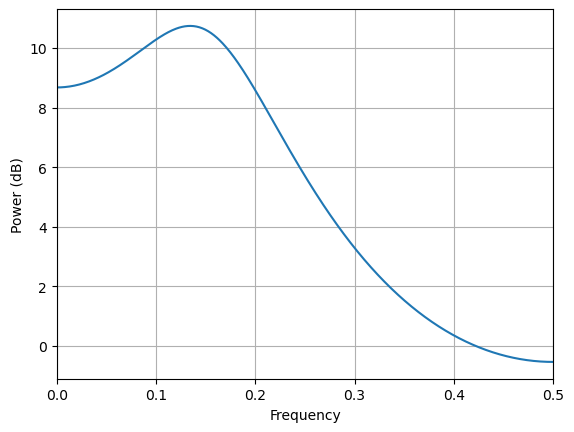

In [18]:
# 2. Estimate Parameters

# Yule-Walker Estimation
rho_yw, _ = yule_walker(ar_signal, order=3)
a_yw = -rho_yw  # Convert to AR coefficients

# Burg Estimation
burg = pburg(ar_signal, order=3, NFFT=1024)
burg.plot()

a_burg = burg.ar.real

# 3. Compare Parameters
print("True Coefficients:", a_true)
print(f"Yule-Walker Estimates: {a_yw}")
print(f"Burg Estimates: {a_burg}")


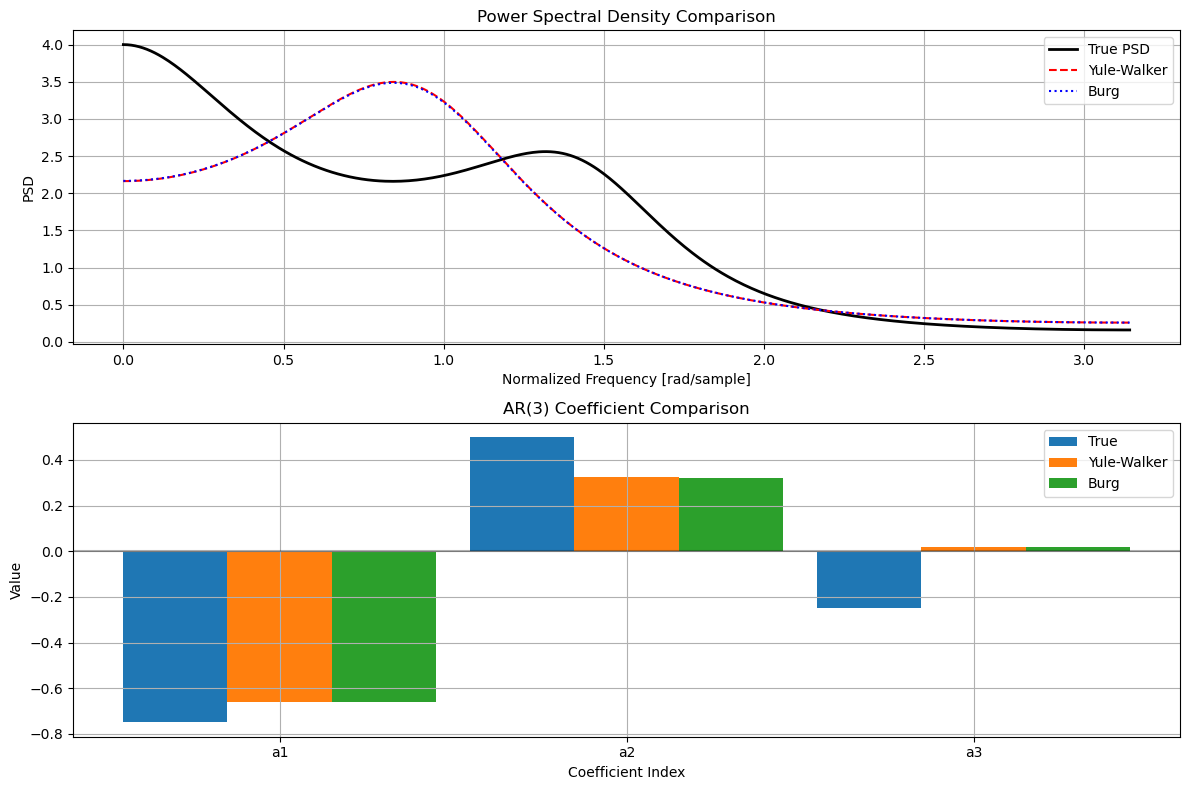

In [19]:
# 4. Compute PSDs

# Frequency vector
freqs = np.linspace(0, np.pi, 512)

# True PSD
_, h_true = freqz(1, np.r_[1, a_true], worN=freqs)
psd_true = np.abs(h_true)**2

# Yule-Walker PSD
_, h_yw = freqz(1, np.r_[1, a_yw], worN=freqs)
psd_yw = np.abs(h_yw)**2

# Burg PSD
_, h_burg = freqz(1, np.r_[1, a_burg], worN=freqs)
psd_burg = np.abs(h_burg)**2

# 5. Plot Results
plt.figure(figsize=(12, 8))

# PSD Comparison
plt.subplot(2, 1, 1)
plt.plot(freqs, psd_true, 'k-', linewidth=2, label='True PSD')
plt.plot(freqs, psd_yw, 'r--', label='Yule-Walker')
plt.plot(freqs, psd_burg, 'b:', label='Burg')
plt.title('Power Spectral Density Comparison')
plt.xlabel('Normalized Frequency [rad/sample]')
plt.ylabel('PSD')
plt.legend()
plt.grid(True)

# Coefficient Comparison
ax = plt.subplot(2, 1, 2)
index = np.arange(3)
bar_width = 0.3
plt.bar(index, a_true, bar_width, label='True')
plt.bar(index + bar_width, a_yw, bar_width, label='Yule-Walker')
plt.bar(index + 2*bar_width, a_burg, bar_width, label='Burg')
plt.axhline(0, color='k', linestyle='-', alpha=0.3)
plt.title('AR(3) Coefficient Comparison')
plt.xlabel('Coefficient Index')
plt.ylabel('Value')
plt.xticks(index + bar_width, ['a1', 'a2', 'a3'])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()